# Project: Image classification for Arabic handwritten character
## Abstract
### An attempt is made to recognize handwritten characters for Arabic characters. The train dataset consist of 13440 images of characters and 28 classes .The feature extraction technique is obtained by normalizing the pixel values. Pixel values will range from 0 to 255 which represents the intensity of each pixel in the image and they are normalized to represent values between 0 - 1. Convolutional neural network is used as a classifier.

### Introduction

#### This data set contains data that mimics Arabic letters. In this project, I will understand the data and try to provide a solution for how to read Arabic handwritten character.

#  0. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1024)
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten ,GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from keras.optimizers import RMSprop
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

Using TensorFlow backend.


# 1. Import the dataset (train and test).
### Original data

In [2]:
# Load the training data
x_train = pd.read_csv('Arabic Handwritten Characters Recognition/csvTrainImages 13440x1024.csv', header = None)
# Load training labels
x_label = pd.read_csv('Arabic Handwritten Characters Recognition/csvTrainLabel 13440x1.csv', names=['count'])
# Load test data
y_test = pd.read_csv('Arabic Handwritten Characters Recognition/csvTestImages 3360x1024.csv', header = None)
# Load test labels
y_label = pd.read_csv('Arabic Handwritten Characters Recognition/csvTestLabel 3360x1.csv', header = None)

# 2. Print the first five rows of the training

In [3]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

# 3. Check for erroneous values

## 3.1. Check for missing values
### The result bellow shows that there are no missing values

In [4]:
null_columns=x_train.columns[x_train.isnull().any()]
x_train[null_columns].isnull().sum()

Series([], dtype: float64)

## 3.2. Check maximum value

## Since we are workin with pixel values, the maximum value should not exceed 255.

In [5]:
x_train.values.max()

255

## 3.3. Check for negative values


In [6]:
(x_train.values < 0).any(), (y_test.values < 0).any()

(False, False)

### Since we are working with pixel values, there should be no negative values. The result shows there are no negative values.

# 4. Print the full summary of the training dataset (before splitting into train-validate)

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB


### The summary above shows that the data has only integer values

# 5. Plot the ditribution of lables

Text(0, 0.5, 'Letters')

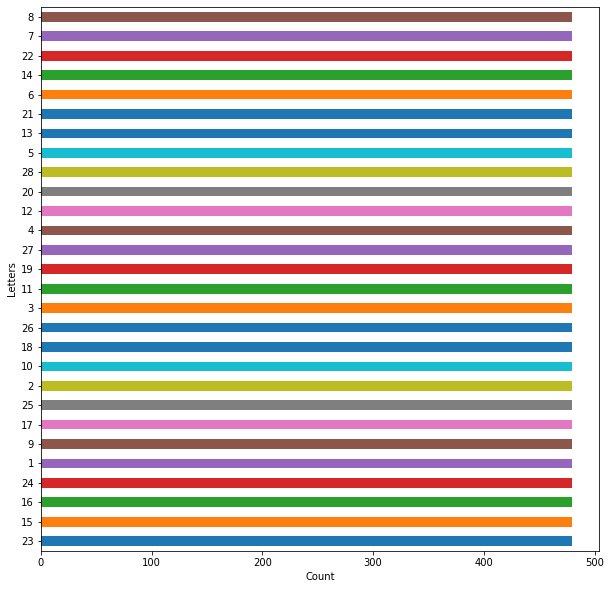

In [8]:
x_label['count'].value_counts().plot(kind='barh', figsize=(10,10))
plt.xlabel('Count')
plt.ylabel('Letters')

### From plotting the data, it appears that we have the same occurrence for each letter

# 6. split the training data into training and validation
### Validation data are used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.

In [9]:
x_train, z_val, x_label, z_label = train_test_split(x_train, x_label, test_size=0.20, random_state=42)

# 7. Print number of rows and columns

In [10]:
print(x_train.shape, x_label.shape, y_test.shape, y_label.shape, z_val.shape, z_label.shape)

(10752, 1024) (10752, 1) (3360, 1024) (3360, 1) (2688, 1024) (2688, 1)


### Training dataset comprises of 10752 observations and 1024 characteristics and 1 dependent variable.
### Testing dataset comprises of 3360 observations and 1024 characteristics and 1 dependent variable.
### Validation dataset comprises of 2688 observations and 1024 characteristics and 1 dependent variable.

# 8. Now we need to take  the values from the data and then convert them into float so we can normalize it between 0–1 without loss of information

In [11]:
x_train = x_train.values.astype('float32')
x_label = x_label.values.astype('int32')-1 #Arabic letters are 28(index starts from 0-27)
y_test = y_test.values.astype('float32')
y_label = y_label.values.astype('int32')-1
z_val = z_val.values.astype('float32')
z_label = z_label.values.astype('int32')-1

# 9. We need to reshape the data from [# images, # features(32X32)] into [#images, # pixels, # pixels], to ensure that the input data to the model is in the correct shape.

In [12]:
x_train = x_train.reshape(-1, 32, 32)
y_test = y_test.reshape(-1, 32, 32)
z_val = z_val.reshape(-1, 32, 32)
x_train.shape, y_test.shape, z_val.shape

((10752, 32, 32), (3360, 32, 32), (2688, 32, 32))

# 10. Create a list of Arabic letters to randomly visualize it later

In [13]:
ArabicLetters = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 
           'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 
            'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 
            'م', 'ن', 'ه', 'و', 'ي']

# 11. Plotting random images of training set along with thier label

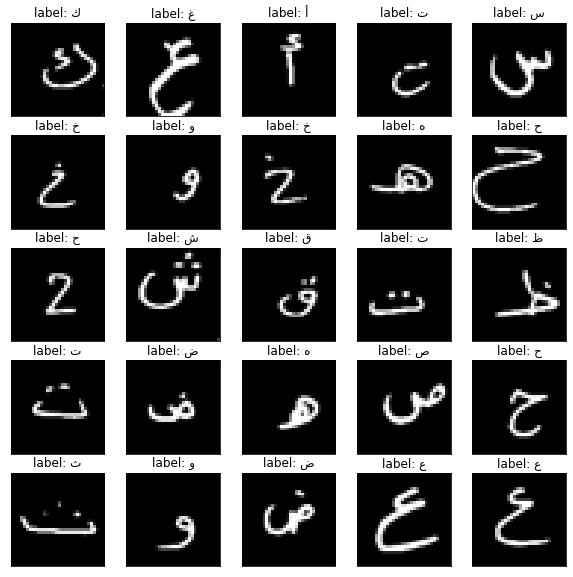

In [14]:
fig = plt.figure(0, figsize=(10,10))
indices = np.random.randint(0, x_train.shape[0], size=25)

for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    img_disp = x_train[idx]
    img_disp = np.rot90(np.flipud(img_disp), k=3) #rotate clockwise (by going counter-clockwise 3 times)
    plt.imshow(img_disp, cmap='gray')
    plt.title("label: {}".format(ArabicLetters[int(x_label[idx])]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# 12. Our Datasets have value in each pixel between 0–255 so now we scale it between 0–1. To normalize the pixel values, divide by 255 (maximum pixel value).

In [15]:
x_train = x_train / 255
y_test = y_test / 255
z_val = z_val / 255

# 13. Convolution2D layers are designed to work with 4 dimensions. Therefore change the dimension of each image to (batch, rows, columns, channels). The channels signify whether the image is grayscale or colored . In this case, it is grayscale images so 1 is given for channels.

In [16]:
x_train = x_train.reshape(-1, 32, 32,1)
y_test = y_test.reshape(-1, 32, 32,1)
z_val = z_val.reshape(-1, 32, 32,1)
(x_train.shape[1:], y_test.shape[1:], z_val.shape[1:])

((32, 32, 1), (32, 32, 1), (32, 32, 1))

# 14. Using One Hot Encoding to transform the number of classes (28) from integer to binary, where one of them will be selected at a time (given a value of 1 and the rest are 0s.

In [17]:
x_label = to_categorical(x_label, num_classes=28)
y_label = to_categorical(y_label, num_classes=28)
z_label = to_categorical(z_label, num_classes=28)

# 15. Finding The Best Model

## 15.1. Lets start with finding the best value for dropout. Dropout will prevent our network from overfitting, so it helps our network to generalize better.

In [18]:
# CNN to find the best dropout
nets = 4
model = [0] *nets
input_shape = (32, 32, 1)
history = [0] * nets

for j in range(nets):
    
    model[j] = Sequential()
    model[j].add(Conv2D(16, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer='uniform', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D(pool_size=2))
    model[j].add(Dropout(rate=j*0.1))

    model[j].add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer='uniform', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D(pool_size=2))
    model[j].add(Dropout(rate=j*0.1))
    
    model[j].add(Conv2D(64, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer='uniform', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D(pool_size=2))
    model[j].add(Dropout(rate=j*0.1))

    model[j].add(Conv2D(64, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer='uniform', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D(pool_size=2))
    model[j].add(Dropout(rate=j*0.1))
    
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(rate=j*0.1))

    model[j].add(Dense(28, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## 15.1.2. Fit the model

In [21]:
names = ["0%","10%","20%","30%"]
for j in range(nets):
    history[j] = model[j].fit(x_train,x_label, batch_size=32, epochs = 5, 
        validation_data = (z_val,z_label), verbose=0)
    print("Dropout {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],5,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

Dropout 0%: Epochs=5, Train accuracy=0.98382, Validation accuracy=0.87500
Dropout 10%: Epochs=5, Train accuracy=0.94727, Validation accuracy=0.92932
Dropout 20%: Epochs=5, Train accuracy=0.91285, Validation accuracy=0.91667
Dropout 30%: Epochs=5, Train accuracy=0.85212, Validation accuracy=0.86384


## 15.1.3. Model visualization

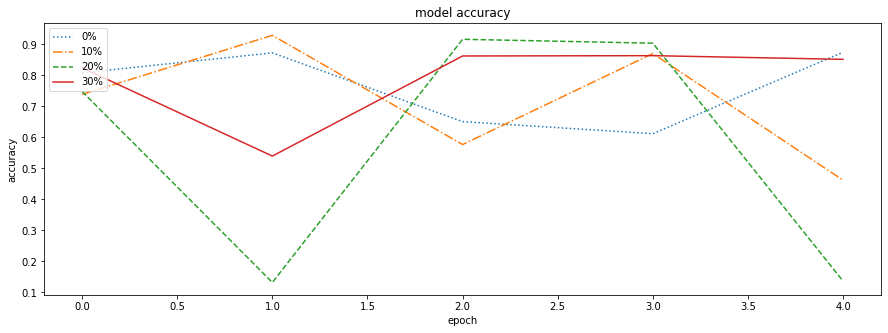

In [22]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
plt.show()

### Based on the results above, I decided to choose 30% Dropout for the model.

# 15.2. Creating a method for experimenting different parameters

In [23]:
nets = 4
history = [0] * nets
names = ["16","32","64","128"]
input_shape = (32, 32, 1)
model = [0] *nets
bat= 5
def create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu'):

    for j in range(nets):
        model[j] = Sequential()

        model[j].add(Conv2D(16, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer=kernel_initializer, activation=activation))
        model[j].add(BatchNormalization())
        model[j].add(MaxPooling2D(pool_size=2))
        model[j].add(Dropout(rate=0.3))
        
        if j>0:
            model[j].add(Conv2D(32, (3,3), padding='same', 
                       kernel_initializer=kernel_initializer, activation=activation))
            model[j].add(BatchNormalization())
            model[j].add(MaxPooling2D(pool_size=2))
            model[j].add(Dropout(rate=0.3))
        
        if j>1:
            model[j].add(Conv2D(64, (3,3), padding='same', 
                       kernel_initializer=kernel_initializer, activation=activation))
            model[j].add(BatchNormalization())
            model[j].add(MaxPooling2D(pool_size=2))
            model[j].add(Dropout(rate=0.3))

        if j>2:
            model[j].add(Conv2D(128, (3,3), padding='same', 
                       kernel_initializer=kernel_initializer, activation=activation))
            model[j].add(BatchNormalization())
            model[j].add(MaxPooling2D(pool_size=2))
            model[j].add(Dropout(rate=0.3))

        if j>3:
            model[j].add(Conv2D(256, (3,3), padding='same', 
                       kernel_initializer=kernel_initializer, activation=activation))
            model[j].add(BatchNormalization())
            model[j].add(MaxPooling2D(pool_size=2))
            model[j].add(Dropout(rate=0.3))


        model[j].add(Flatten())
        model[j].add(Dense(128, activation='relu'))
        model[j].add(BatchNormalization())
        model[j].add(Dropout(rate=0.3))

        # fully connected Final layer
        model[j].add(Dense(28, activation='softmax'))

        model[j].compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return model[j]

# 15.2.1. Trying a different paramenters (Optimizers, Kernel_initializers amd activation functions) to find the best parameter values.

In [25]:
optimizer = ['RMSprop', 'Adam','Adagrad']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear']

for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(x_train, x_label, 
                    validation_data=((z_val,z_label)),
                    epochs=5, batch_size=32, shuffle=True, verbose=1)
    print("------------------------------------------------------------------------------------")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 2.0954 - acc: 0.3869 - val_loss: 4.8716 - val_acc: 0.0658
Epoch 2/5
10752/10752 [==============================] - 10s 966us/sample - loss: 1.1081 - acc: 0.6509 - val_loss: 2.0901 - val_acc: 0.3475
Epoch 3/5
10752/10752 [==============================] - 14s 1ms/sample - loss: 0.8371 - acc: 0.7350 - val_loss: 0.7757 - val_acc: 0.7481
Epoch 4/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 0.6958 - acc: 0.7782 - val_loss: 1.6383 - val_acc: 0.5253
Epoch 5/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 0.6114 - acc: 0.8049 - val_loss: 0.8145 - val_acc: 0.7452
------------------------------------------------------------------------------------
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Train on 10752 

Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 36s 3ms/sample - loss: 2.9993 - acc: 0.1894 - val_loss: 3.0784 - val_acc: 0.1522
Epoch 2/5
10752/10752 [==============================] - 30s 3ms/sample - loss: 2.4539 - acc: 0.2885 - val_loss: 2.1615 - val_acc: 0.4059
Epoch 3/5
10752/10752 [==============================] - 34s 3ms/sample - loss: 2.2494 - acc: 0.3415 - val_loss: 1.8457 - val_acc: 0.4699
Epoch 4/5
10752/10752 [==============================] - 31s 3ms/sample - loss: 2.1087 - acc: 0.3803 - val_loss: 1.7514 - val_acc: 0.4859
Epoch 5/5
10752/10752 [==============================] - 24s 2ms/sample - loss: 1.9994 - acc: 0.4043 - val_loss: 1.6749 - val_acc: 0.5078
------------------------------------------------------------------------------------
{'optimizer': 'Adagrad', 'kernel_initializer': 'normal', 'activation': 'linear'}
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [=======================

### From the results above, it seem that the best parameters are:
## 1- {'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
## 2- {'optimizer': 'Adam', 'kernel_initializer': 'normal', 'activation': 'relu'}
## 3- {'optimizer': 'Adam', 'kernel_initializer': 'uniform', 'activation': 'relu'}
## After running the model multiple times I decided to go with {'optimizer': 'Adam', 'kernel_initializer': 'uniform', 'activation': 'relu'}.

# 15.2.2. Finding the best values for CNN filters.

In [29]:
for j in range(nets):
    model [j] = create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu')
    history[j] = model[j].fit(x_train, x_label, validation_data=((z_val,z_label)),
                              epochs=5, batch_size=32, shuffle=True, verbose=0)    
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
         names[j],5,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN 16: Epochs=5, Train accuracy=0.82571, Validation accuracy=0.75781
CNN 32: Epochs=5, Train accuracy=0.82692, Validation accuracy=0.80283
CNN 64: Epochs=5, Train accuracy=0.81371, Validation accuracy=0.72582
CNN 128: Epochs=5, Train accuracy=0.81315, Validation accuracy=0.74144


### From the results above, it appears that 32 Filters is the best. to reduce the complexityArchitectures with higher filters are not worth the additional computation cost.

### plot the model Accuracy VS Epoch

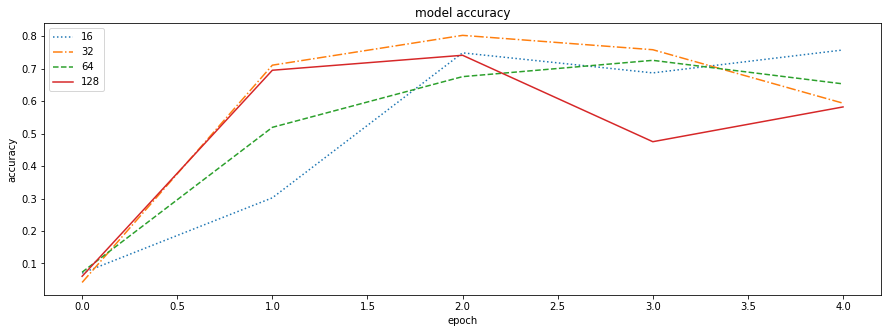

In [41]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
plt.show()

# 16. Building The Final Model With The Best Parameters

In [42]:
input_shape = (32, 32, 1)

model = Sequential()
model.add(Conv2D(16, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(64, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(64, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))

model.add(Dense(28, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
batch_normalization_90 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_91 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 8, 8, 32)        

## 16.1 About the model
### 1. The first layer is the input which is the first convolutional hidden layer , the layer has N feature(Filters) which is  (the number of output filters in the convolution),  with window size of 3×3 and an activation function (relu).
### 2. The second layer is batch normalization which solves having distributions of the features vary across the training and test data. It is used to help in faster learning and higher overall accuracy.
### 3.  Third layer is the MaxPooling layer, which is used to down-sample the input input representation,reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned. It helps reducing overfitting and computational cost by reducing the number of parameters to learn.
### 4. The next layer is Dropout. It is set to exclude 30% of the neurons in the layer. 
### 5. Steps 1 - 4 are repeated 4 times
### 6. After that a Flatten layer is used to transform the output (tensor) from the previous layer into a one dimensional tensor. It allows the output to be processed by standard fully connected layers.
### 7. Prior to the last layer there is a dense layer. With each input node is connected to each output node with BatchNormalization and Dropout layers.
### 8. Last layer is a dense, which is a fully connected final layer with 28 neurons (number of output classes) and it as multi-classes so it uses softmax activation function.

In [43]:
history = model.fit(x_train, x_label, validation_data=(z_val,z_label),epochs=10, batch_size=32, shuffle=True, verbose=1)

Train on 10752 samples, validate on 2688 samples
Epoch 1/10
10752/10752 [==============================] - 20s 2ms/sample - loss: 2.8060 - acc: 0.1999 - val_loss: 6.8056 - val_acc: 0.0379
Epoch 2/10
10752/10752 [==============================] - 16s 1ms/sample - loss: 1.5724 - acc: 0.4762 - val_loss: 1.8490 - val_acc: 0.4062
Epoch 3/10
10752/10752 [==============================] - 17s 2ms/sample - loss: 1.1040 - acc: 0.6176 - val_loss: 0.9250 - val_acc: 0.7013
Epoch 4/10
10752/10752 [==============================] - 18s 2ms/sample - loss: 0.8738 - acc: 0.7008 - val_loss: 0.7030 - val_acc: 0.7541
Epoch 5/10
10752/10752 [==============================] - 19s 2ms/sample - loss: 0.7371 - acc: 0.7522 - val_loss: 0.7557 - val_acc: 0.7589
Epoch 6/10
10752/10752 [==============================] - 17s 2ms/sample - loss: 0.6421 - acc: 0.7794 - val_loss: 0.8038 - val_acc: 0.7489
Epoch 7/10
10752/10752 [==============================] - 16s 2ms/sample - loss: 0.6045 - acc: 0.7947 - val_loss: 0.5

## 16.2. Accuracy VS Epoch Visualization

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


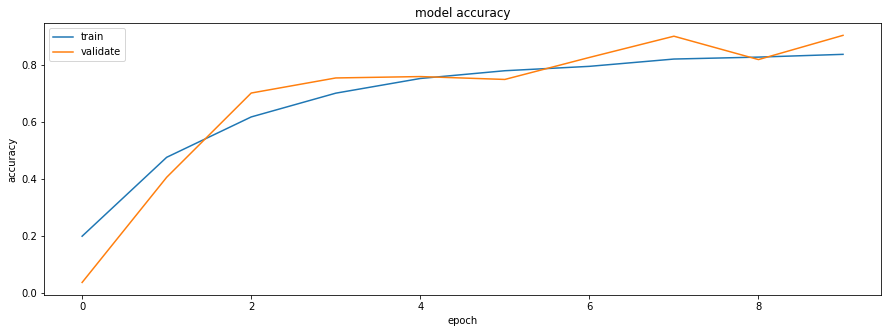

In [44]:
# summarize history for acuuracy
print(history.history.keys())
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

## 16.3. Loss VS Epoch Visualization

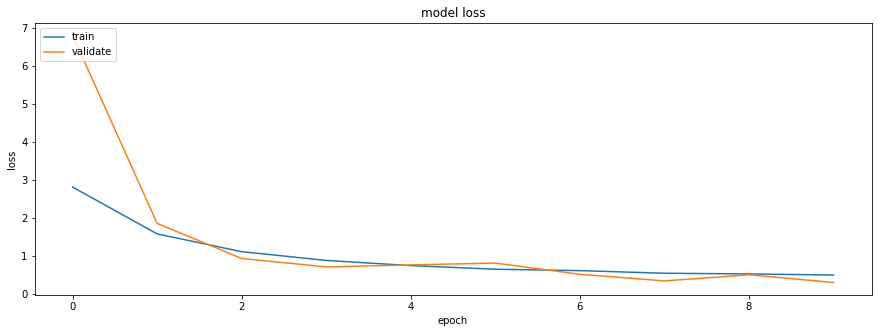

In [45]:
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

## 16.4. Saving the best model to use it later 

In [46]:
model.save('my_model.hdf5')

# 17. Testing the model on the Test Dataset

In [47]:
evaluate = model.evaluate(y_test, y_label, verbose=1)

3360/3360 [==============================] - 1s 394us/sample - loss: 0.2838 - acc: 0.9098


## It us greate, we got 90% accuracy from 10 epochs

# 18. Increase the number of epochs to get a better accuracy, and save the model that reduces the validation loss

In [50]:
epochs = 25
from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='my_model.hdf5', verbose=1, save_best_only=True)

history = model.fit(x_train, x_label, 
                    validation_data=(z_val, z_label),
                    epochs=epochs, batch_size=32, verbose=1, callbacks=[checkpointer])
          
model.load_weights('my_model.hdf5')

Train on 10752 samples, validate on 2688 samples
Epoch 1/25
10720/10752 [============================>.] - ETA: 0s - loss: 0.2525 - acc: 0.9161
Epoch 00001: val_loss improved from inf to 0.12426, saving model to my_model.hdf5
10752/10752 [==============================] - 17s 2ms/sample - loss: 0.2523 - acc: 0.9162 - val_loss: 0.1243 - val_acc: 0.9591
Epoch 2/25
10720/10752 [============================>.] - ETA: 0s - loss: 0.2378 - acc: 0.9207
Epoch 00002: val_loss improved from 0.12426 to 0.11753, saving model to my_model.hdf5
10752/10752 [==============================] - 17s 2ms/sample - loss: 0.2375 - acc: 0.9209 - val_loss: 0.1175 - val_acc: 0.9624
Epoch 3/25
10720/10752 [============================>.] - ETA: 0s - loss: 0.2356 - acc: 0.9216
Epoch 00003: val_loss did not improve from 0.11753
10752/10752 [==============================] - 17s 2ms/sample - loss: 0.2368 - acc: 0.9214 - val_loss: 0.5744 - val_acc: 0.7805
Epoch 4/25
10688/10752 [============================>.] - ETA: 

### After increasing the epochs to 25 we got a higher accuracy, we can get even a  better accuracy by increasing the epochs more

In [52]:
metrics = model.evaluate(y_test, y_label, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

3360/3360 [==============================] - 1s 393us/sample - loss: 0.1214 - acc: 0.9649
Test Accuracy: 0.9648809432983398
Test Loss: 0.12135044537551169


# 19. Evaluating the model
### printing classification report (Precision, recall, f1-score and support)

In [53]:
def get_predicted_classes(model, data, labels):
    image_predictions = model.predict(y_test)
    predicted_classes = np.argmax(image_predictions, axis=1)
    true_classes = np.argmax(y_label, axis=1)
    return predicted_classes, true_classes

def get_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))
        
y_pred, y_true = get_predicted_classes(model, y_test, y_label)
get_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       120
           1       0.99      0.99      0.99       120
           2       0.90      0.97      0.93       120
           3       0.97      0.92      0.94       120
           4       0.99      0.96      0.97       120
           5       0.94      0.98      0.96       120
           6       0.98      0.97      0.97       120
           7       0.91      0.99      0.95       120
           8       0.93      0.93      0.93       120
           9       0.94      0.98      0.96       120
          10       0.98      0.90      0.94       120
          11       0.97      1.00      0.98       120
          12       0.98      0.98      0.98       120
          13       0.97      0.97      0.97       120
          14       0.98      0.93      0.96       120
          15       0.96      1.00      0.98       120
          16       0.99      0.96      0.97       120
          17       0.98    

# 20. Conclusion
### As we see above, we got a pretty good accuracy and the model can get better over more epochs. Training CNN is a random process, each time you run the experiment you get a different results. It depends on multiple hyperparameters (number of layers, number of feature maps in each layer, dropouts, batch normalization, etc...). Therefore, you must run your experiments multiple times before you choose your final model.
